In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
model_name = 'llama-3.1-8B-Instruct'
df = pd.read_csv(f'./{model_name}/results.csv')
df

,task,score,model,method
0,2wikimqa,45.06,llama-3.1-8B-Instruct,baseline
1,dureader,28.48,llama-3.1-8B-Instruct,baseline
2,gov_report,20.41,llama-3.1-8B-Instruct,baseline
3,hotpotqa,55.90,llama-3.1-8B-Instruct,baseline
4,lcc,62.99,llama-3.1-8B-Instruct,baseline
...,...,...,...,...
573,repobench-p,56.21,llama-3.1-8B-Instruct,StreamingQuant_4_256
574,samsum,35.33,llama-3.1-8B-Instruct,StreamingQuant_4_256
575,trec,72.50,llama-3.1-8B-Instruct,StreamingQuant_4_256
576,triviaqa,91.98,llama-3.1-8B-Instruct,StreamingQuant_4_256


In [21]:
df = pd.read_csv(f'./{model_name}/results.csv')
df = pd.concat([df[df['method'].str.contains('_2_128')], df[df['method'] == 'baseline']], axis=0)
df['method'] = df['method'].str.replace('_2_128', '')
df

,task,score,model,method
21,2wikimqa,39.52,llama-3.1-8B-Instruct,KiVi
22,dureader,22.20,llama-3.1-8B-Instruct,KiVi
23,gov_report,18.60,llama-3.1-8B-Instruct,KiVi
24,hotpotqa,48.83,llama-3.1-8B-Instruct,KiVi
25,lcc,47.09,llama-3.1-8B-Instruct,KiVi
...,...,...,...,...
16,repobench-p,56.57,llama-3.1-8B-Instruct,baseline
17,samsum,35.72,llama-3.1-8B-Instruct,baseline
18,trec,72.50,llama-3.1-8B-Instruct,baseline
19,triviaqa,91.64,llama-3.1-8B-Instruct,baseline


In [22]:
df = df[df['method'].isin(['baseline', 'KiVi', 'LogQuant', 'PartialLogQuant'])]
df['method'] = df['method'].replace('LogQuant', 'LogQuant (ours)')
df['method'] = df['method'].replace('PartialLogQuant', 'PartialLogQuant (ours)')
df['method'] = df['method'].replace('baseline', 'Baseline(BF16)')

/tmp/ipykernel_251072/355479241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['method'] = df['method'].replace('LogQuant', 'LogQuant (ours)')
/tmp/ipykernel_251072/355479241.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['method'] = df['method'].replace('PartialLogQuant', 'PartialLogQuant (ours)')
/tmp/ipykernel_251072/355479241.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [23]:
categories = {
    "Single-Document QA": ["narrativeqa", "qasper", "multifieldqa_en", "multifieldqa_zh"],
    "Multi-Document QA": ["hotpotqa", "2wikimqa", "musique", "dureader"],
    "Summarization": ["gov_report", "qmsum", "multi_news", "vcsum"],
    "Few-shot Learning": ["trec", "triviaqa", "samsum", "lsht"],
    "Synthetic Tasks": ["passage_count", "passage_retrieval_en", "passage_retrieval_zh"],
    "Code Completion": ["lcc", "repobench-p"]
}

tasks = 0
for category, task_list in categories.items():
    tasks += len(task_list)
    print(f"{category}: {len(task_list)} tasks")
print(f"Total: {tasks} tasks")

Single-Document QA: 4 tasks
Multi-Document QA: 4 tasks
Summarization: 4 tasks
Few-shot Learning: 4 tasks
Synthetic Tasks: 3 tasks
Code Completion: 2 tasks
Total: 21 tasks


/tmp/ipykernel_251072/1393223064.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='center')
/tmp/ipykernel_251072/1393223064.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='center')
/tmp/ipykernel_251072/1393223064.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='center')
/tmp/ipykernel_251072/1393223064.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='center')
/tmp/ipykernel_251072/1393223064.py:12: UserWarning:

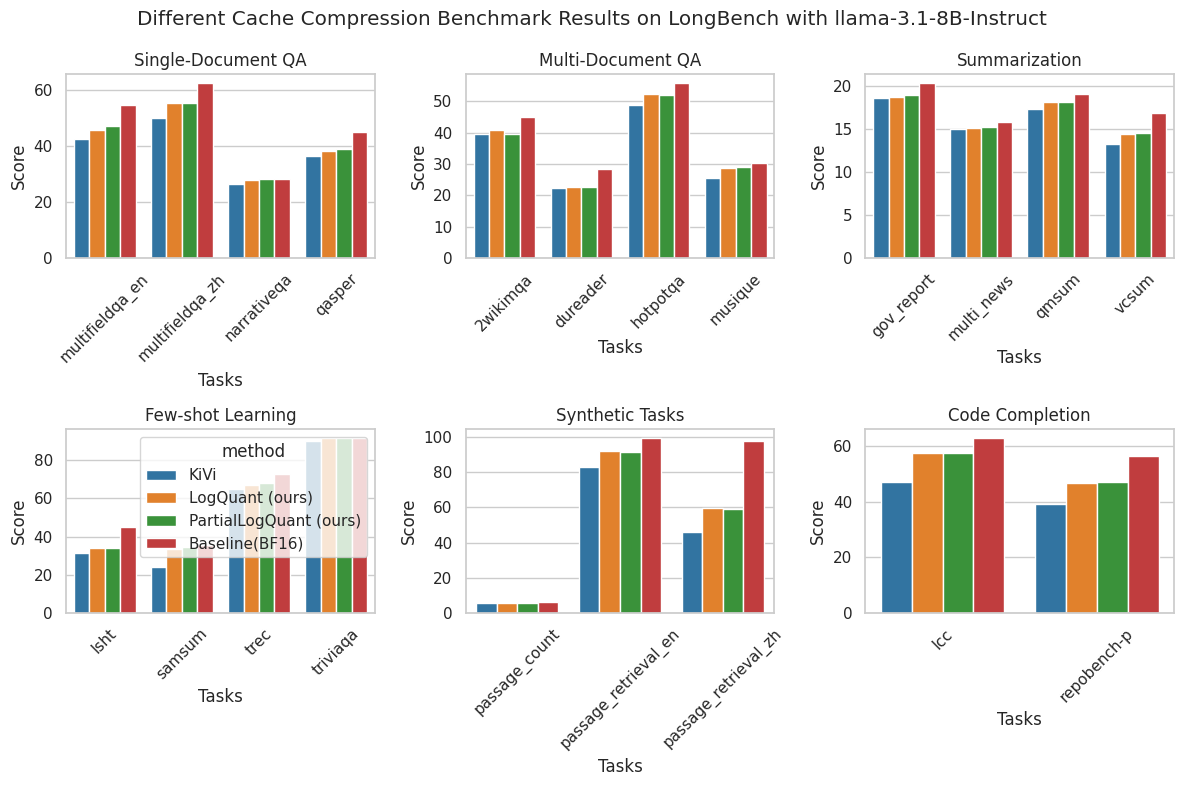

In [24]:
sns.set_theme(style="whitegrid")
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle(f'Different Cache Compression Benchmark Results on LongBench with {model_name}')
#set color palette by tab10, but turn KiVi into dark color, the rest into light color
colors = sns.color_palette("tab10")
#colors[0] = (0.3, 0.2, 0.1)
sns.set_palette(colors)
for i, (category, task_list) in enumerate(categories.items()):
    ax = axs[i // 3, i % 3]
    ax.set_title(category)
    sns.barplot(x='task', y='score', hue='method', data=df[df['task'].isin(task_list)], ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='center')
    ax.set_ylabel('Score')
    ax.set_xlabel('Tasks')
    if i != 3:
        ax.get_legend().remove()

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig(f'./{model_name}/results.png')
plt.show()


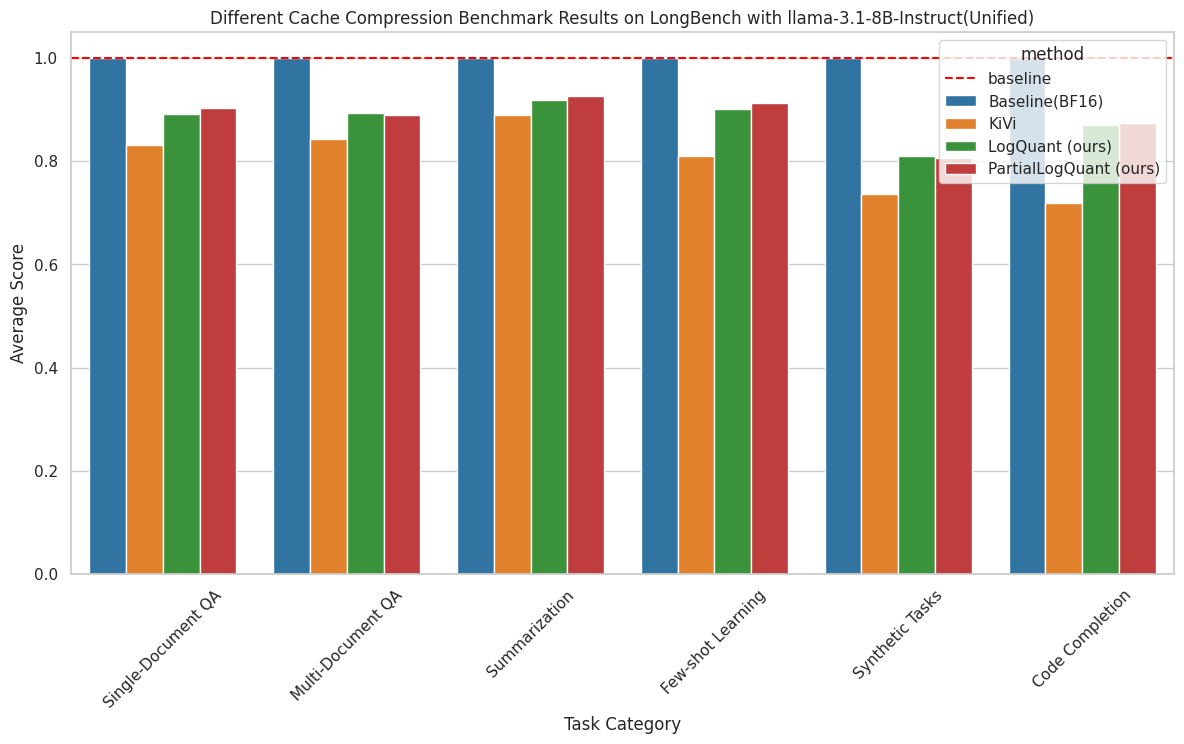

In [26]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.set_palette(colors)
fig.suptitle(f'Different Cache Compression Benchmark Results on LongBench with {model_name}(Unified)')
df_task_category = None
for i, (category, task_list) in enumerate(categories.items()):
    df_tmp = df[df['task'].isin(task_list)]
    tasks_tmp = df_tmp['task'].unique()
    for task in tasks_tmp:
        baseline_score = df_tmp[(df_tmp['task'] == task) & (df_tmp['method'] == 'Baseline(BF16)')]['score'].values[0]
        for method in df_tmp['method'].unique():
            df_tmp.loc[(df_tmp['task'] == task) & (df_tmp['method'] == method), 'score'] /= baseline_score
    df_tmp_avg = df_tmp[['score', 'method']].groupby('method').mean().reset_index()
    df_tmp_avg['task'] = category
    if df_task_category is None:
        df_task_category = df_tmp_avg
    else:
        df_task_category = pd.concat([df_task_category, df_tmp_avg], axis=0, ignore_index=True)

df_task_category = df_task_category[df_task_category['method'] != 'baseline']
#draw the baseline at y=1
plt.axhline(y=1, color='red', linestyle='--', label='baseline')
sns.barplot(x='task', y='score', hue='method', data=df_task_category)
plt.ylabel('Average Score')
plt.xlabel('Task Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.title(f'Different Cache Compression Benchmark Results on LongBench with {model_name}(Unified)')
plt.savefig(f'{model_name}/results_tasks_unified.png', dpi=600)